原网址：https://www.kaggle.com/marsggbo/kaggle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 2),dpi=120)
import numpy as np

import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data_train = pd.read_csv('../kaggle-data/House Prices/train.csv')

In [3]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


1. 分析'SalePrice'

In [4]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

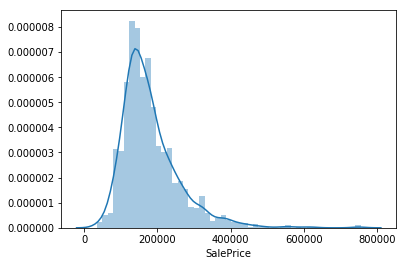

In [5]:
sns.distplot(data_train['SalePrice'])

>峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量
    它是和正太分布相比较的。
    1. Kurtosis = 0 与正太分布陡缓程度相同。
    2. Kurtosis > 0 比正太分布的高峰更加陡峭--尖顶峰
    3. Kurtosis < 0 比正太分布的高峰来的平
>偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量

In [6]:
print('Skewness: %f' %data_train['SalePrice'].skew())
print('Kurtosis: %f' %data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


   SalePrice CentralAir
0     208500          Y
1     181500          Y
2     223500          Y
3     140000          Y
4     250000          Y


(-0.5, 1.5, 0, 800000)

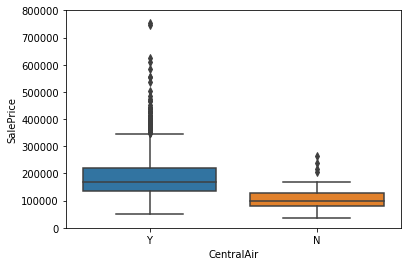

In [7]:
#中央空调
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
print(data.head())
fig = sns.boxplot(x = var, y ='SalePrice', data=data)
fig.axis(ymin = 0, ymax=800000)

      SalePrice  OverallQual
0        208500            7
1        181500            6
2        223500            7
3        140000            7
4        250000            8
5        143000            5
6        307000            8
7        200000            7
8        129900            7
9        118000            5
10       129500            5
11       345000            9
12       144000            5
13       279500            7
14       157000            6
15       132000            7
16       149000            6
17        90000            4
18       159000            5
19       139000            5
20       325300            8
21       139400            7
22       230000            8
23       129900            5
24       154000            5
25       256300            8
26       134800            5
27       306000            8
28       207500            5
29        68500            4
...         ...          ...
1430     192140            5
1431     143750            6
1432      6450

(-0.5, 9.5, 0, 800000)

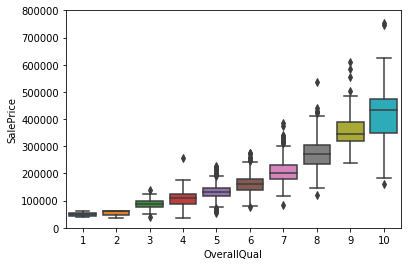

In [8]:
# 总体评价
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
print(data)
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 111.5, 0, 800000)

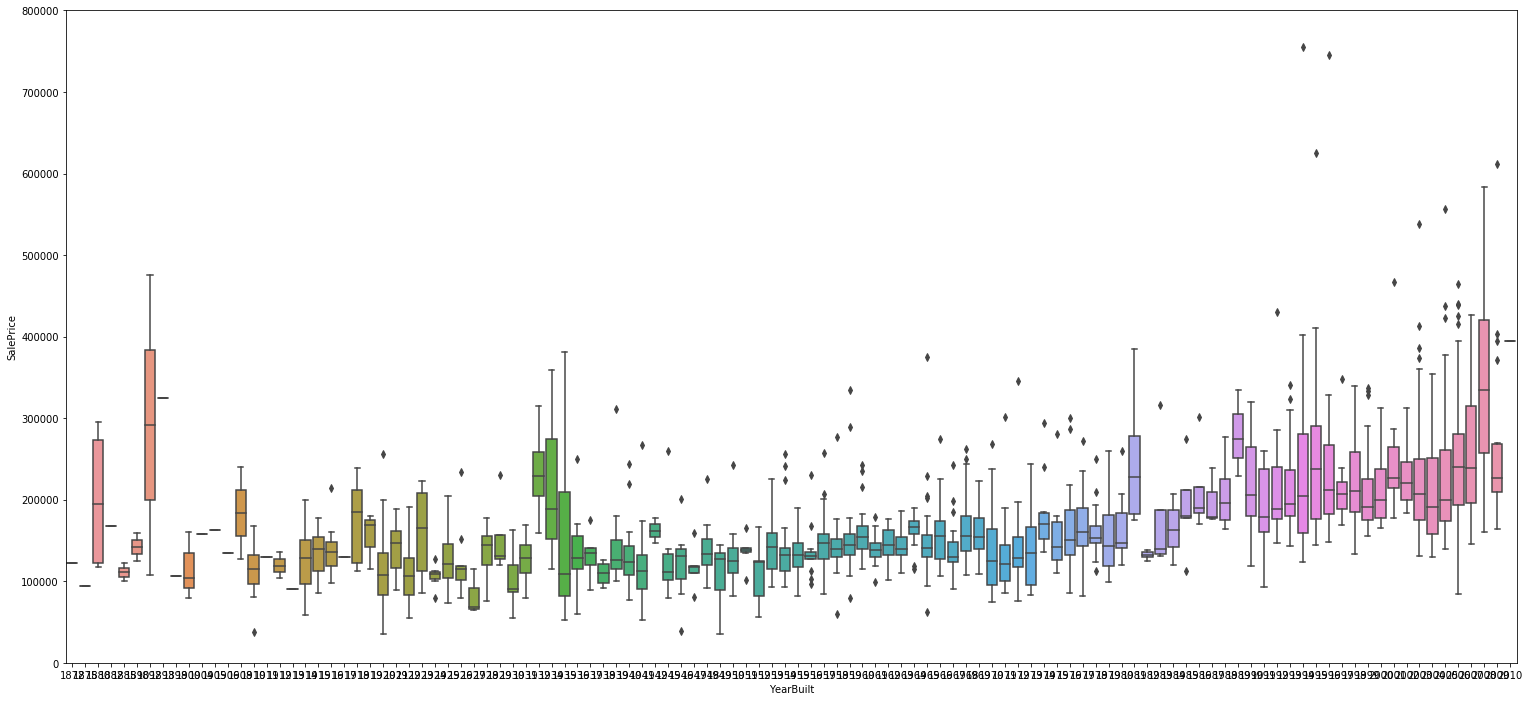

In [9]:
# YearBuilt
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

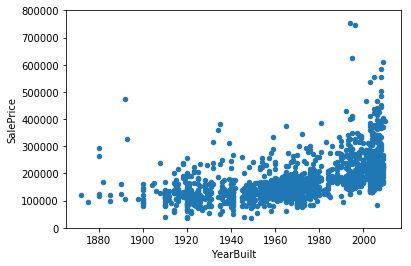

In [10]:
# YearBuilt scatter
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x = var, y = 'SalePrice', ylim=(0, 800000))

Neighborhood

(-0.5, 24.5, 0, 800000)

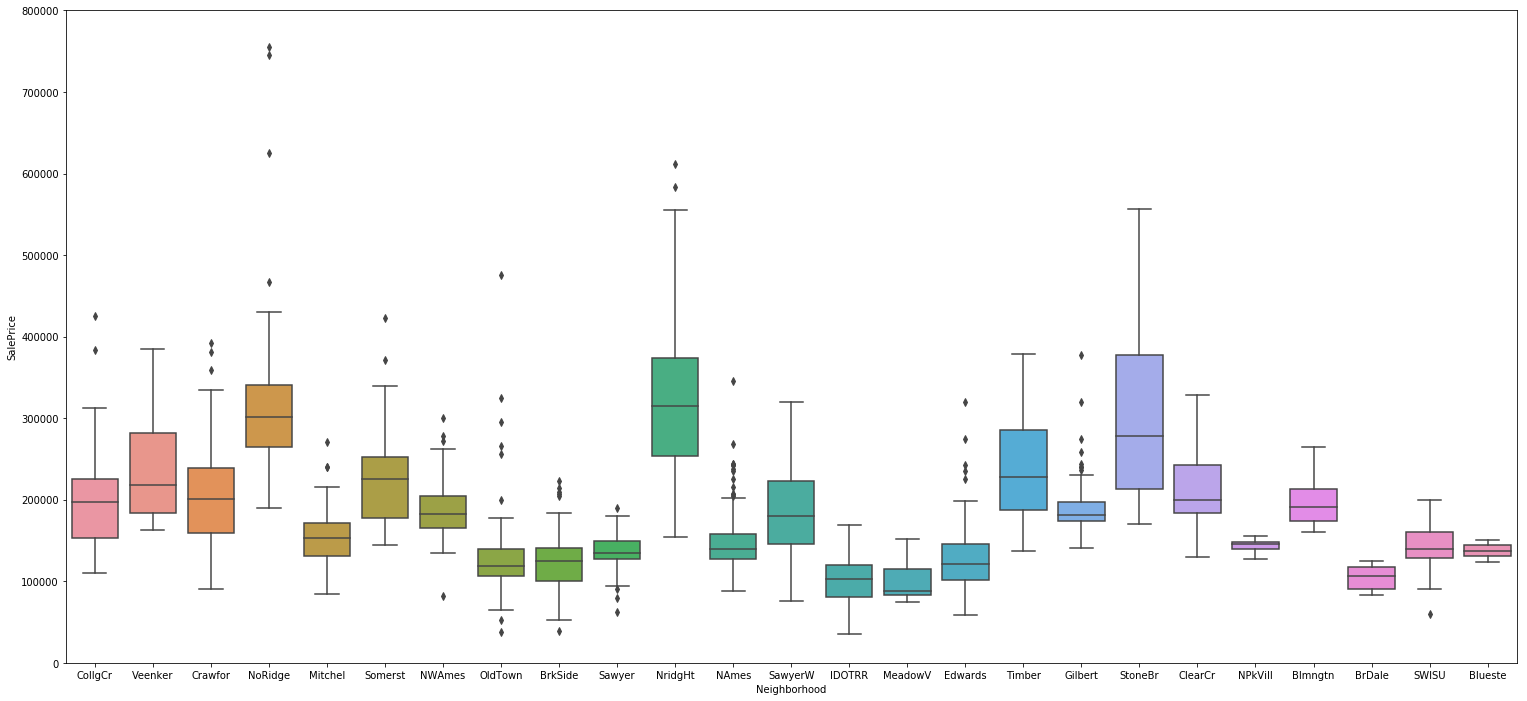

In [11]:
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

In [12]:
location = []
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
data.sort_values(['Neighborhood', 'SalePrice'])
nd_data = data

数值型特征

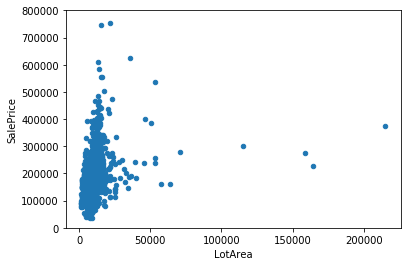

In [13]:
var = 'LotArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y = 'SalePrice', ylim=(0, 800000))

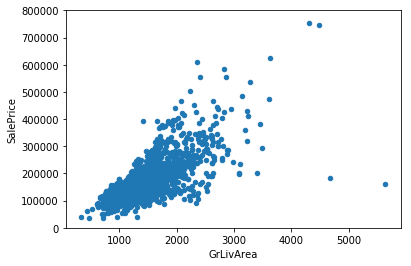

In [14]:
var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

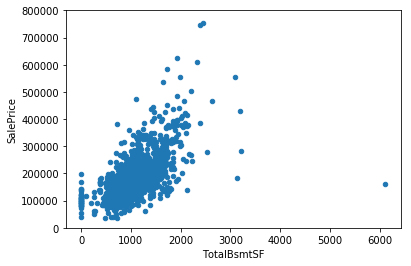

In [15]:
var = 'TotalBsmtSF'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

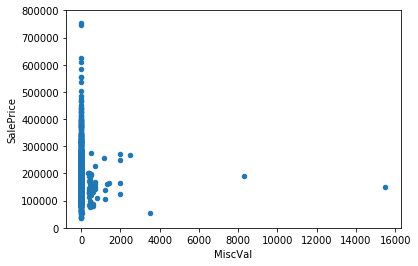

In [16]:
var = 'MiscVal'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

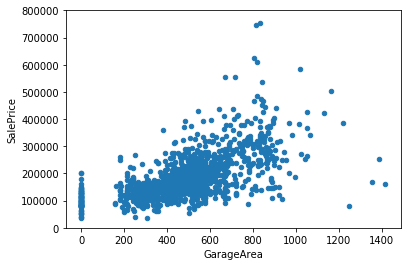

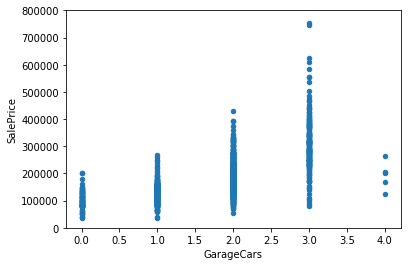

In [17]:
var = ['GarageArea', 'GarageCars']
for index in range(2):
    data = pd.concat([data_train['SalePrice'], data_train[var[index]]], axis=1)
    data.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000))

#### 更加科学的分析数据
1. 得到各个特征之间的关系矩阵
2. SalePrice的关系矩阵
3. 绘制出最相关的特征之间的关系图

#### 关系矩阵

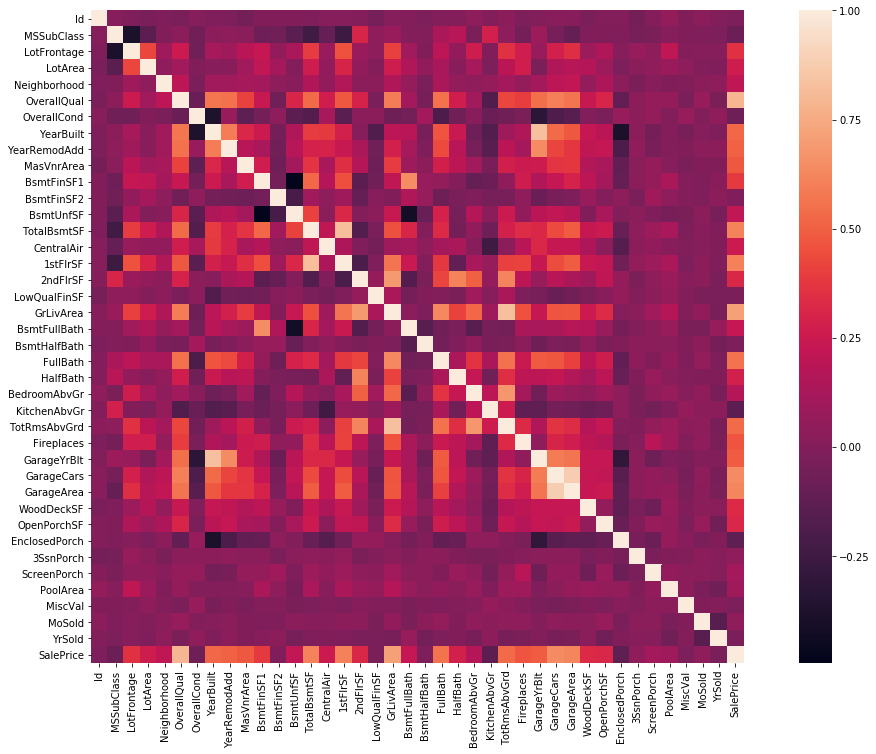

In [21]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=1, square=True)

颜色越浅的表示相关程度越大。
根据这个图我们可以得到相关性很强的有（ps:部分指标是作者主观判断的，和实际颜色判断有差别。实际取相关性指标我理解应该按照下面的房价关系矩阵来判断是否需要这个指标）：

1. OverallQual
2. YearBuilt
3. TotalBsmtSF
4. 1stFlrSF
5. GrLivArea
6. FullBath
7. TotRmsAbvGrd
8. GarageCars
9. GarageArea

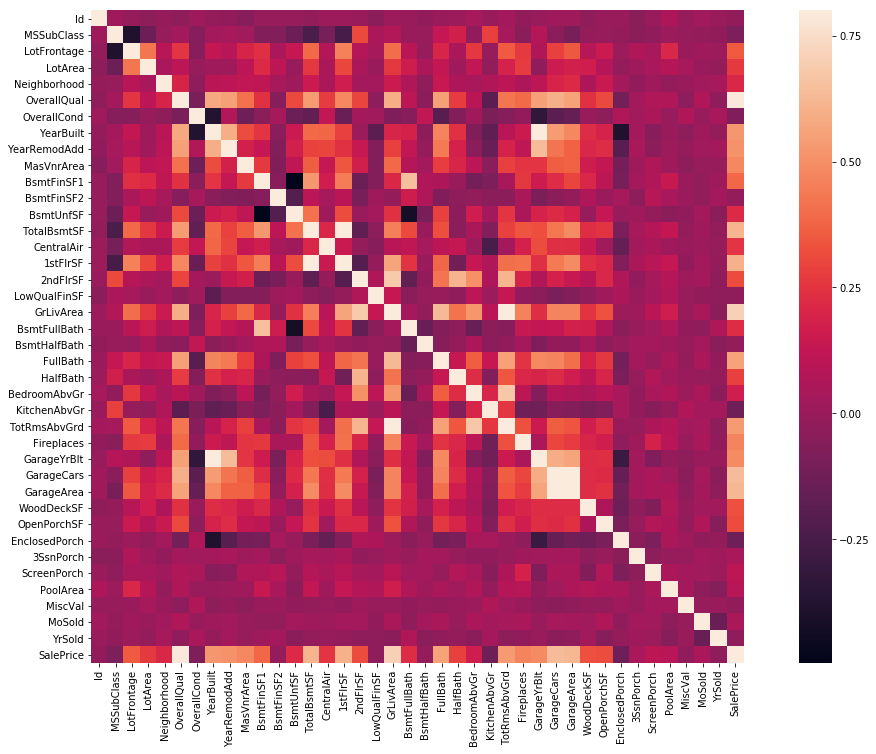

In [22]:
# 查看CentralAir，Neighborhood对房价的影响。（ps：和上面的结果好像没区别？）
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=0.8, square=True)

房价关系矩阵

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'CentralAir', 'BsmtFullBath', 'BsmtUnfSF', 'Neighborhood',
       'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch'],
      dtype='object')


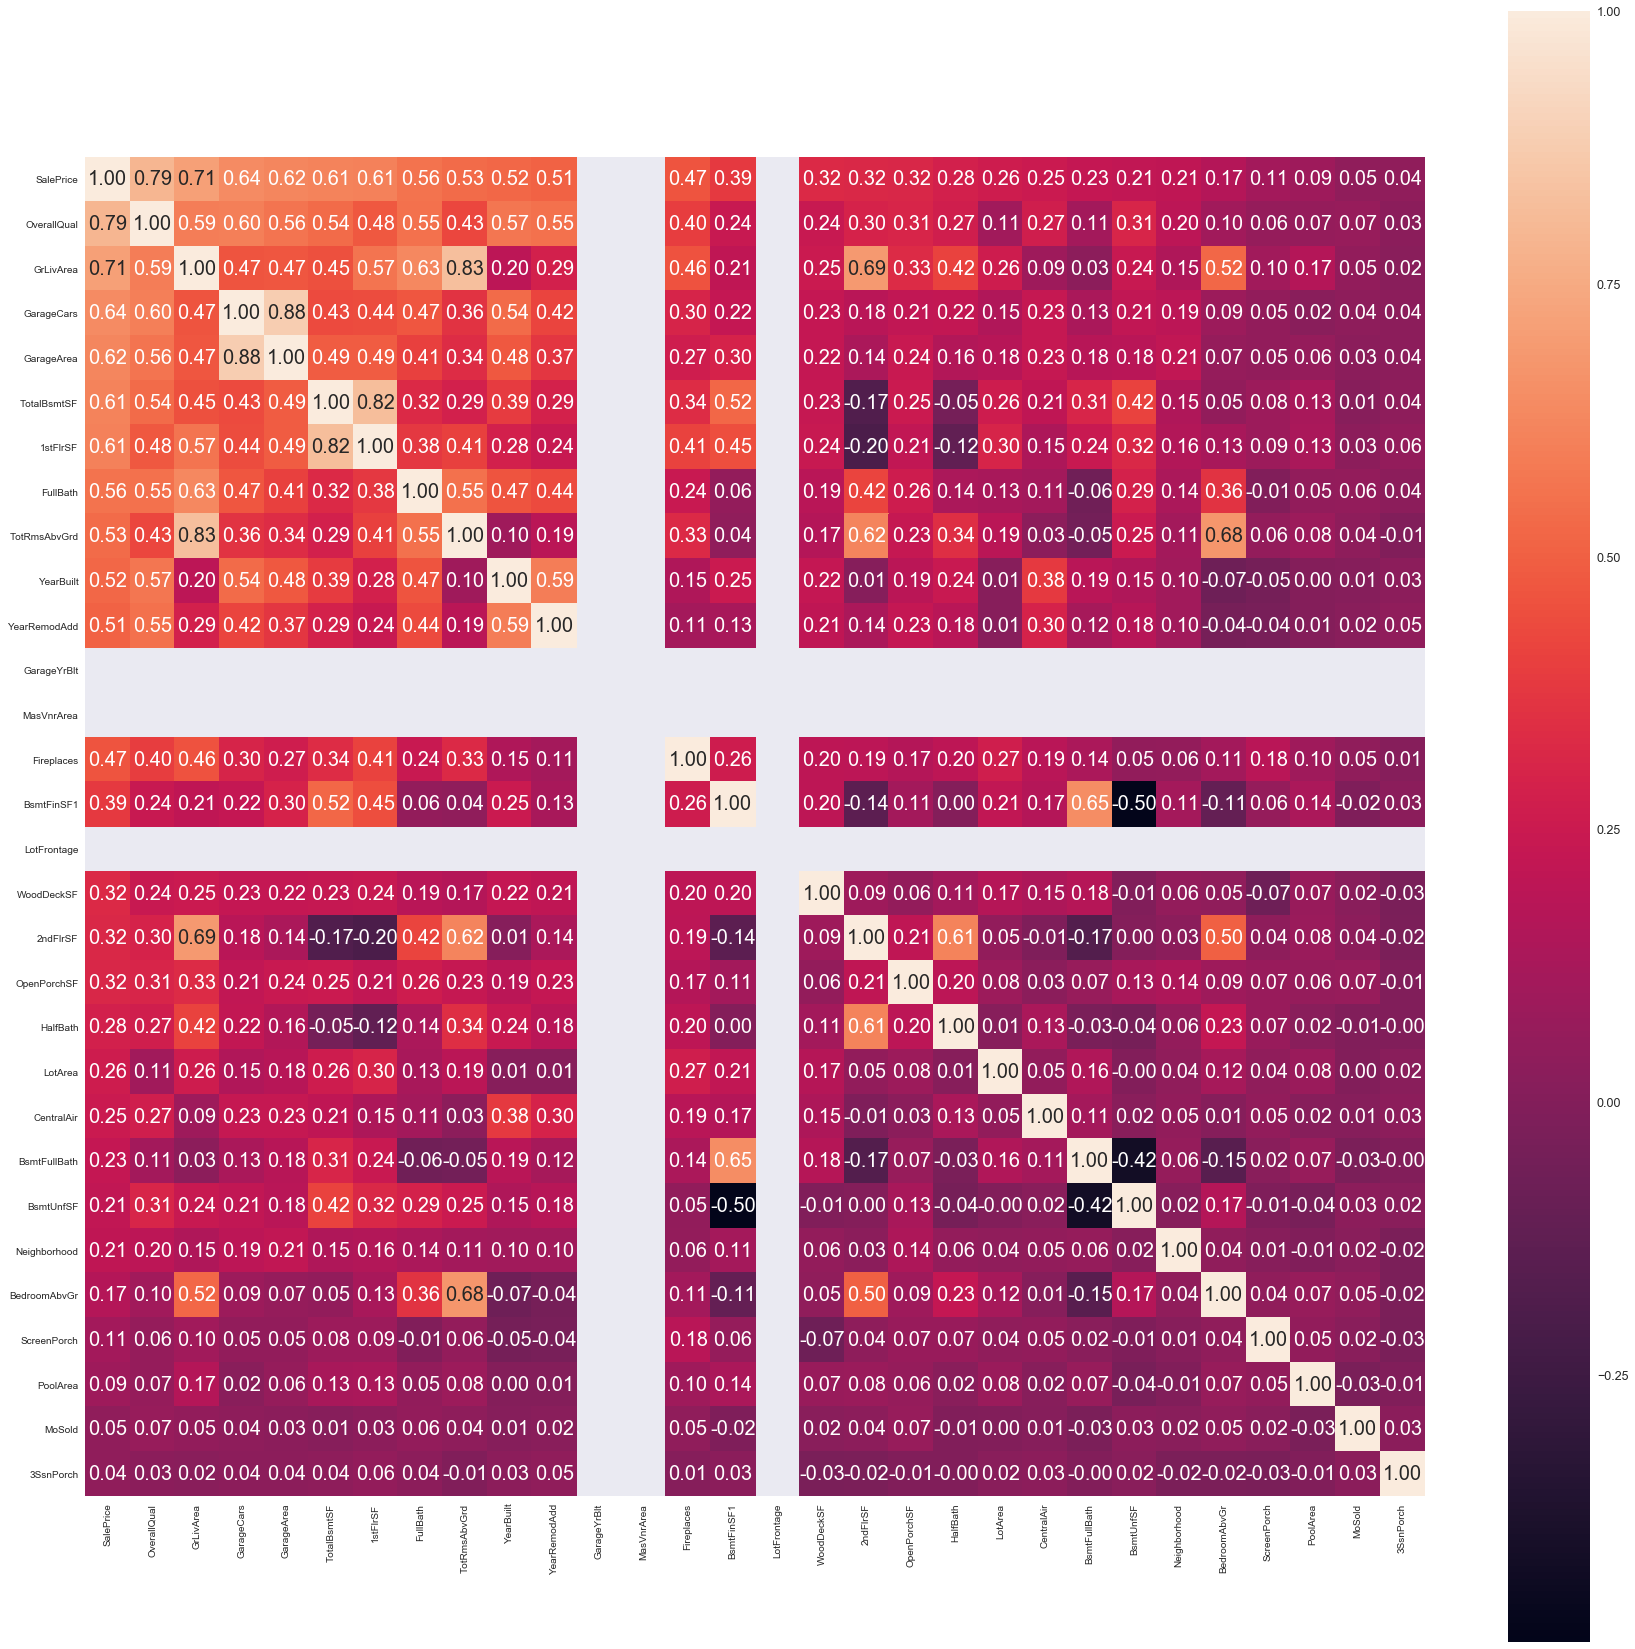

In [31]:
k = 30 #关系矩阵图中将显示20个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data_train[cols].values.T)
#print('cm:', cm)
f, ax = plt.subplots(figsize=(30, 30))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

由图可以得到相关性强的几个指标：
'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd'

绘制关系点图

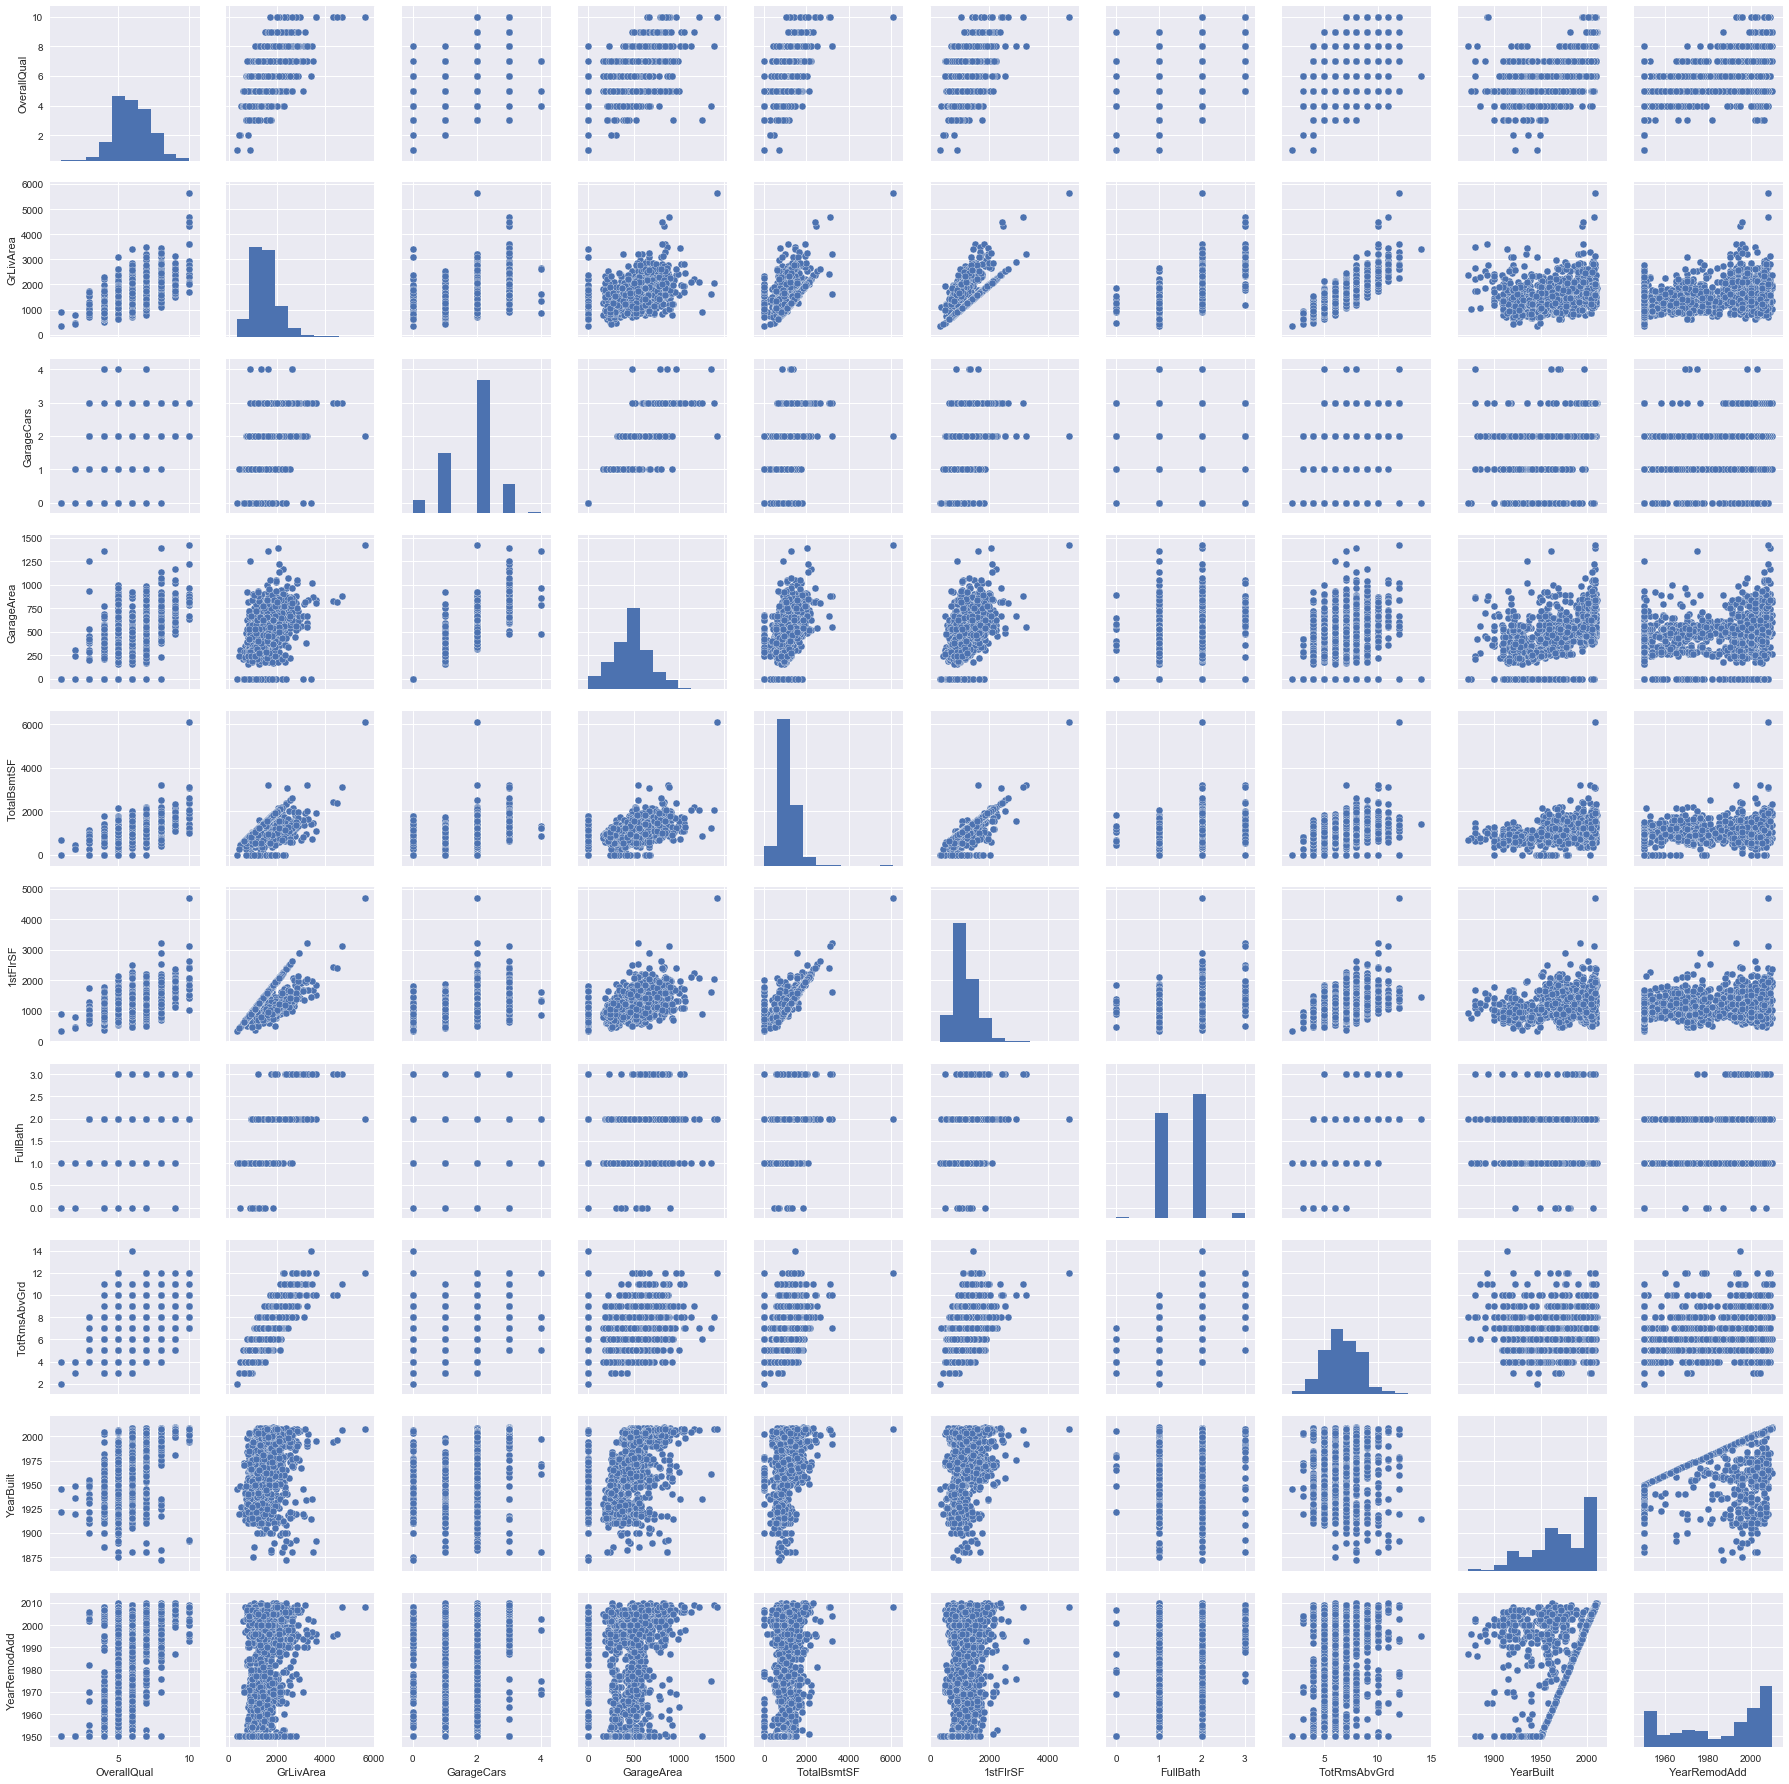

In [30]:
sns.set()
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
        'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']
sns.pairplot(data_train[cols], size=2.5)
plt.show()